In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [13]:
data=pd.read_csv("C:/Users/user/Indian-liver-patients.csv")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age of the patient                 583 non-null int64
Gender of the patient              583 non-null object
Total Bilirubin                    583 non-null float64
Direct Bilirubin                   583 non-null float64
Alkphos Alkaline Phosphotase       583 non-null int64
Sgpt Alamine Aminotransferase      583 non-null int64
Sgot Aspartate Aminotransferase    583 non-null int64
Total Protiens                     583 non-null float64
Albumin                            583 non-null float64
Albumin and Globulin Ratio         579 non-null float64
Liver patient or not               583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Liver patient or not
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


The number of liver patients 416
The number of non liver_patients 167


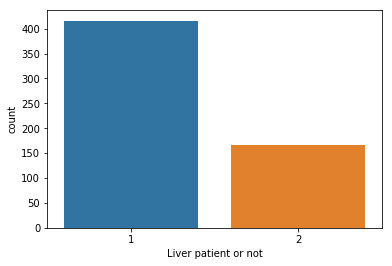

In [3]:
sns.countplot(data=data,x="Liver patient or not",label="count")

patient,not_patient=data["Liver patient or not"].value_counts()
print("The number of liver patients",patient)
print("The number of non liver_patients",not_patient)

In [14]:
data_null=data[data.isnull().any(axis=1)]
data_null

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Liver patient or not
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [15]:
data.isnull().sum()
mean=round(data["Albumin and Globulin Ratio"].mean(),2)
data["Albumin and Globulin Ratio"]=data["Albumin and Globulin Ratio"].fillna(mean)
data.loc[[209,241,253,312],:]

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Liver patient or not
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,0.95,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,0.95,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,0.95,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,0.95,2


In [16]:
#data.boxplot(column="Sgot Aspartate Aminotransferase")
data.isnull().sum()

Age of the patient                 0
Gender of the patient              0
Total Bilirubin                    0
Direct Bilirubin                   0
Alkphos Alkaline Phosphotase       0
Sgpt Alamine Aminotransferase      0
Sgot Aspartate Aminotransferase    0
Total Protiens                     0
Albumin                            0
Albumin and Globulin Ratio         0
Liver patient or not               0
dtype: int64

In [17]:
x=data["Albumin"]/data["Albumin and Globulin Ratio"]
x=pd.DataFrame(x)
data=pd.concat([data,x],1)
data.rename(columns={0:"Globulin"},inplace=True)
data.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Liver patient or not,Globulin
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,3.666667
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,4.324324
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,3.707865
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,3.400000
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,6.000000


In [20]:
data.corr()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Liver patient or not,Globulin
Age of the patient,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216109,-0.137351,0.055025
Total Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206184,-0.220208,0.222123
Direct Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200030,-0.246046,0.224296
Alkphos Alkaline Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233989,-0.184866,0.178138
Sgpt Alamine Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002395,-0.163416,-0.011083
Sgot Aspartate Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934,0.068175
Total Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233916,0.035008,0.569877
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686360,0.161388,0.027755
Albumin and Globulin Ratio,-0.216109,-0.206184,-0.200030,-0.233989,-0.002395,-0.070040,0.233916,0.686360,1.000000,0.162349,-0.617963
Liver patient or not,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162349,1.000000,-0.117298


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 12 columns):
Age of the patient                 583 non-null int64
Gender of the patient              583 non-null object
Total Bilirubin                    583 non-null float64
Direct Bilirubin                   583 non-null float64
Alkphos Alkaline Phosphotase       583 non-null int64
Sgpt Alamine Aminotransferase      583 non-null int64
Sgot Aspartate Aminotransferase    583 non-null int64
Total Protiens                     583 non-null float64
Albumin                            583 non-null float64
Albumin and Globulin Ratio         583 non-null float64
Liver patient or not               583 non-null int64
Globulin                           583 non-null float64
dtypes: float64(6), int64(5), object(1)
memory usage: 54.7+ KB


In [21]:
#let us avoid few columns like Direct Bilirubin and Sgot
data_corr=data.iloc[:,[0,1,2,4,5,7,8,10,11]]

In [27]:
data_corr.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Total Protiens,Albumin,Liver patient or not,Globulin
0,65,Female,0.7,187,16,6.8,3.3,1,3.666667
1,62,Male,10.9,699,64,7.5,3.2,1,4.324324
2,62,Male,7.3,490,60,7.0,3.3,1,3.707865
3,58,Male,1.0,182,14,6.8,3.4,1,3.400000
4,72,Male,3.9,195,27,7.3,2.4,1,6.000000


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [57]:

x=data_corr.drop("Liver patient or not",1)
x=pd.get_dummies(x)
y=data_corr["Liver patient or not"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
#x_train.shape

In [58]:
#import pickle
model = LogisticRegression(random_state=5)
model.fit(x_train, y_train)
#filename="C:/Users/user/logreg.csv"
#pickle.dump(logreg,open(filename,"wb"))

C:\Users\user\Anaconda3\envs\NewEnv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=5, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
y_pred = model.predict(x_test)
#y_pred=pd.DataFrame(y_pred)
accuracy_score(y_test,y_pred)
#np.unique(y_pred,return_counts=True)

0.7314285714285714

## Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
data_corr_d=pd.get_dummies(data_corr)
x=data_corr_d.drop("Liver patient or not",1)
y=data_corr_d["Liver patient or not"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=52)

In [97]:
model = DecisionTreeClassifier(criterion = "gini", random_state = 1,
                              max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [98]:
y_pred = model.predict(x_test)
y_pred=pd.DataFrame(y_pred)

from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)
cm

#([[TP, FP],
#  [FN, TN]]

array([[128,   1],
       [ 43,   3]], dtype=int64)

In [99]:
sensitivity=cm[0,0]/(cm[0,0]+cm[1,0])
sensitivity

0.7485380116959064

In [100]:
accuracy_score(y_test, y_pred)

0.7485714285714286